In [12]:
import pandas as pd
import numpy as np
import os

#
if not os.path.exists("data_lake"):
    os.makedirs("data_lake")

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
    #
    data = {
        "coluna1": np.random.randint(0, 100, num_rows_per_file),
        "coluna2": np.random.randn(num_rows_per_file),
        "Coluna3": np.random.choice(["A", "B", "C"], num_rows_per_file),
    }

    #
    df = pd.DataFrame(data)

    #
    file_name = f"data_lake/dados_{i+1}.csv"
    df.to_csv(file_name, index=False)

    #
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

#
for file_name, df in dfs:
    print(f"\nDados do arquivo: {file_name}\n")
    print(df.head())

Dados do Data Lake gerados com sucesso!

Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 Coluna3
0       90  0.641490       C
1       62 -1.423118       A
2       82 -0.028914       C
3       83 -0.221738       A
4       13  0.739613       B

Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 Coluna3
0       59  1.961778       B
1       44  0.298379       A
2       59  0.219420       B
3       16  1.272801       B
4       53 -0.069616       B

Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 Coluna3
0       87 -0.096806       C
1       38 -0.255357       C
2       58 -1.961438       A
3       39 -1.051217       A
4       90 -0.857559       B

Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 Coluna3
0       30 -0.508515       C
1       25  1.695096       C
2       17  1.024765       A
3       89  0.230022       A
4       18  0.583650       B

Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 Coluna3
0       69  0.561080     

In [13]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

#
if not os.path.exists("data_lake"):
    os.makedirs("data_lake")

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
    #
    data = {
        "coluna1": np.random.randint(0, 100, num_rows_per_file),
        "coluna2": np.random.randn(num_rows_per_file),
        "Coluna3": np.random.choice(["A", "B", "C"], num_rows_per_file),
    }

    #
    df = pd.DataFrame(data)

    #
    file_name = f"data_lake/dados_{i+1}.csv"
    df.to_csv(file_name, index=False)

    #
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

#
#
conn_string = "sqlite:///data_lake.db"

#
engine = create_engine(conn_string)

#
for i, (file_name, df) in enumerate(dfs, 1):
    table_name = f"dados_{i}"
    df.to_sql(table_name, engine, index=False, if_exists="replace")

Dados do Data Lake gerados com sucesso!


Primeiras linhas do DataFrame:
   coluna1   coluna2 Coluna3
0       27 -1.617425       B
1        5  0.420314       C
2       74  0.855420       A
3       10  0.365804       C
4       76  1.892239       C

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   Coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Estatísticas do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.620000    -0.033450
std      28.036756     0.980051
min       0.000000    -2.617959
25%      27.000000    -0.720959
50%      50.500000    -0.058705
75%      75.000000     0.591177
max      99.000000     3.158402


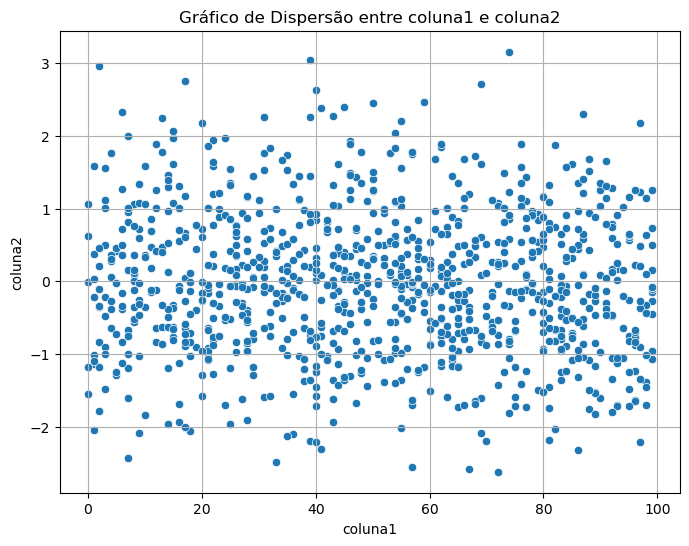

c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


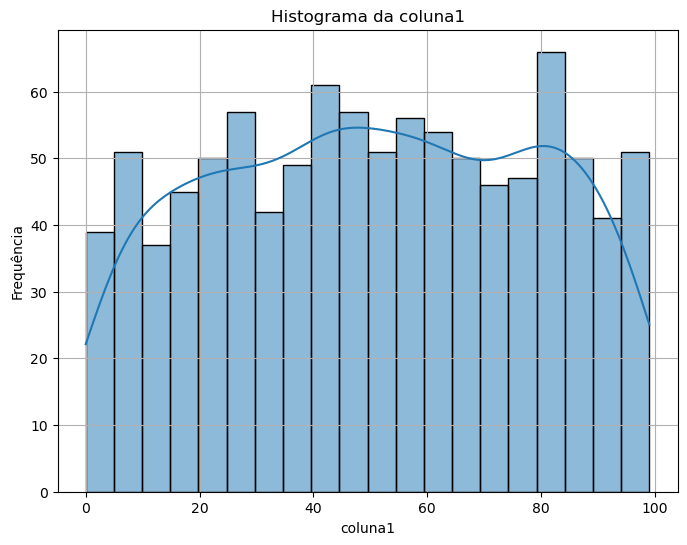

c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anrry\miniconda3\envs\myenv\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


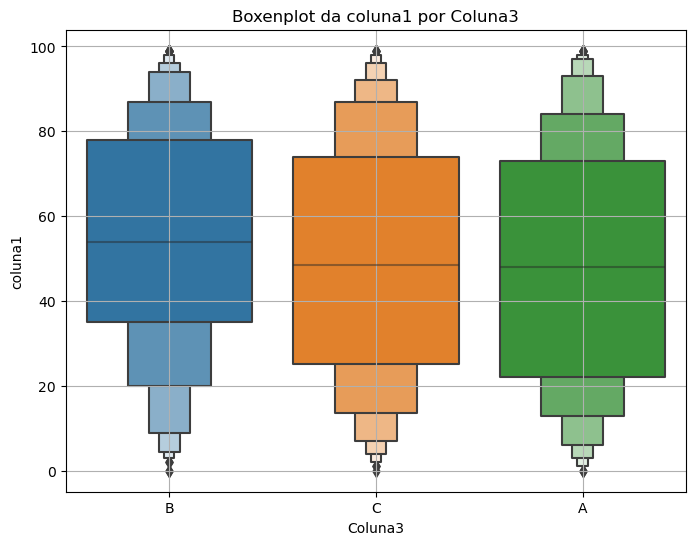

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#
conn_string = "sqlite:///data_lake.db"
engine = create_engine(conn_string)

#
table_name = "dados_1"  #
df = pd.read_sql_table(table_name, engine)

#
print("Primeiras linhas do DataFrame:")
print(df.head())

#
print("\nInformações do DataFrame:")
print(df.info())

#
print("\nEstatísticas do DataFrame:")
print(df.describe())

#
#
plt.figure(figsize=(8, 6))
sns.scatterplot(x="coluna1", y="coluna2", data=df)
plt.title("Gráfico de Dispersão entre coluna1 e coluna2")
plt.xlabel("coluna1")
plt.ylabel("coluna2")
plt.grid(True)
plt.show()

#
plt.figure(figsize=(8, 6))
sns.histplot(df["coluna1"], bins=20, kde=True)
plt.title("Histograma da coluna1")
plt.xlabel("coluna1")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

#
plt.figure(figsize=(8, 6))
sns.boxenplot(x="Coluna3", y="coluna1", data=df)
plt.title("Boxenplot da coluna1 por Coluna3")
plt.xlabel("Coluna3")
plt.ylabel("coluna1")
plt.grid(True)
plt.show()